<a href="https://colab.research.google.com/github/vaishnavipatil29/PR-ML-Assignments/blob/main/Copy_of_Copy_of_Dimensionality_reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab link :
https://colab.research.google.com/drive/1iTaz69e9KZJdt71OgdcHnHqqFNqQn-yN?usp=sharing


Classification:
1. K nearest neighbor (K-NN)

Dimensionality Reduction techniques:
1. Principal component analysis (PCA)
2. Linear discriminative analysis (LDA)

# K-NN


Text(0.5, 1.0, 'Data visualization')

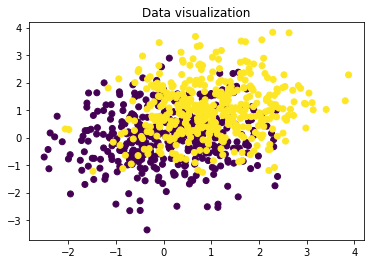

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))
plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [ ]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [ ]:
def get_neighbors(train,label_train, test_row, num_neighbors):
  # insert your code here
  dist = []
  for i in range(len(train)) :
    dist.append((train[i],label_train[i],euclidean_distance(test_row,train[i])))
  dist.sort(key=lambda tup: tup[-1])
  neighbors = [(i[0],i[1]) for i in dist]
  return neighbors

In [ ]:
def predict_classification(neighbors):
  # insert your code here
  classes = [row[-1] for row in neighbors]
  prediction = max(set(classes),key = classes.count)
  return prediction

In [ ]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))

In [ ]:
K=2
pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  neig=get_neighbors(data_train,label, data_test[i,:], K)
  pred_label[i]=predict_classification(neig)
accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')








Testing Accuracy= 65.5 %


# Principal component analysis (PCA)
1. Generate 2D data of 1000 points
2. 

Text(0.5, 1.0, 'distribution in y direction')

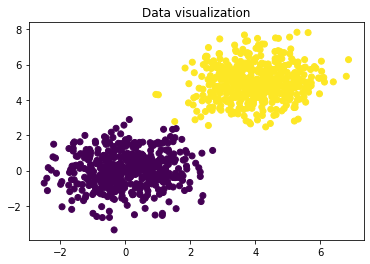

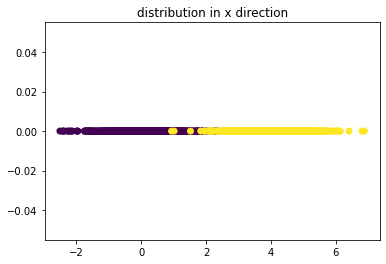

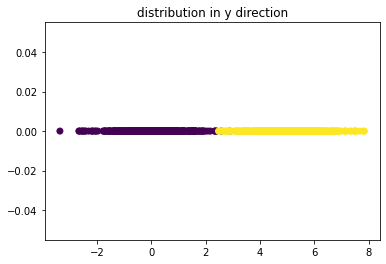

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


Text(0.5, 1.0, 'Data visualization')

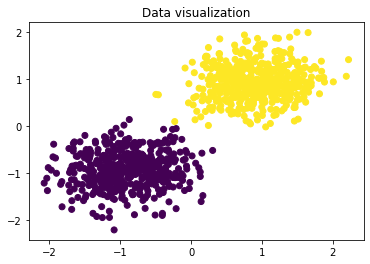

In [ ]:
#Data normalization
data = data - np.mean(data , axis = 0)
data=data/(np.std(data,axis=0)+10**(-30))
# perform data normalization here using mean substraction and std division
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

variance along pca1 direction= 1.8477663843459722
variance along pca2 direction= 0.15223361565402702
(1000, 2)


Text(0.5, 1.0, 'distribution in pca2 direction')

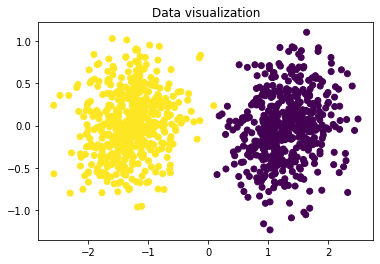

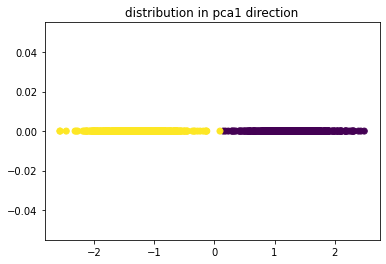

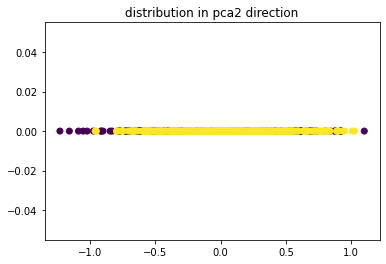

In [ ]:
# PCA

# coverance matrix
cov=data.T @ data


# using sigular value decomposition
u,s,v=np.linalg.svd(cov)

trans_data=np.dot(data,u)# insert your code here

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)
print(data.shape)

plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')

PCA 1 dimension is sufficient, we can droup PCA 2 dimension

In [ ]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim=retain_dim if ret_dim is  None else self.ret_dim(self.data)
    # compute pca transform value
  def pca_comp(self,data):
    data=self.pre_process(data)
    cov=data.T @ data# insert your code here
    u,_,_=np.linalg.svd(cov) # singular value decomposition
    k = self.ret_dim(data)
    u_req=u[:,0:k]# insert your code here
    trans_data=np.dot(data,u_req)# insert your code here
    return trans_data,u_req
    # compute the required retain dimension
  def ret_dim(self,data):
    ind = 0
    data=self.pre_process(data)
    cov=data.T @ data
    _,s,_=np.linalg.svd(cov)
   # insert your code here # can also take 90% 
    
    for ind in range(data.shape[1]):
      val = np.sum(s[ind])/np.sum(s)
      if val >=0.90:
        break 
    return ind+1
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

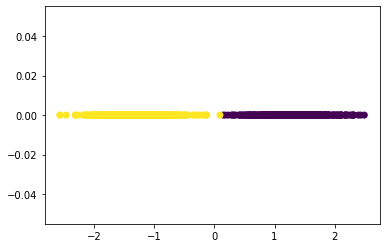

In [ ]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

In [ ]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
trans_data = trans_data.reshape(trans_data.shape[0],1)
trans_mat = trans_mat.reshape(trans_mat.shape[0],1)

knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
tst_label = tst_label.reshape(tst_label.shape[0],1)

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)





KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!pip install idx2numpy

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


(100, 784)
(100,)


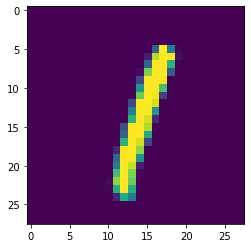

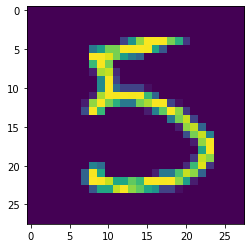

In [ ]:
# MNIST data

import numpy as np
import matplotlib.pyplot as plt 

file1='train-images.idx3-ubyte'
file2='train-labels.idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



Initial data dimension= 784
Retained dimesion after PCA= 24
KNN Training accuracy = 99
(50, 28, 28)
KNN Testing accuracy = 98


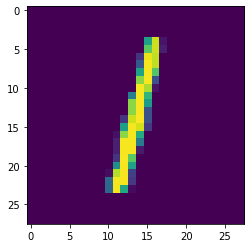

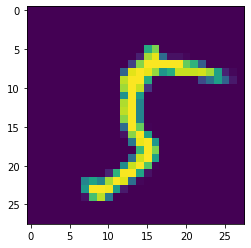

In [ ]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)

## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


# Linear Discriminate Analysis (LDA)

Text(0.5, 1.0, 'distribution in y direction')

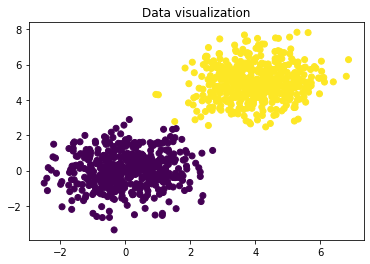

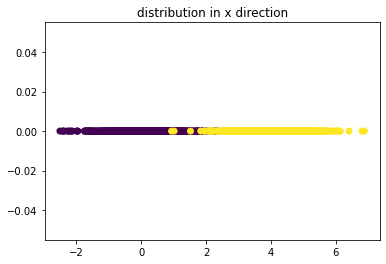

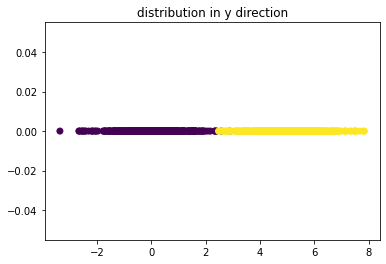

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

In [ ]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))


  cls=np.unique(label)
  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]=  (data_l[i] - data_l[i].mean(axis=0)).T@(data_l[i] - data_l[i].mean(axis=0))# insert your code here
    S_w=S_w+cov_l[i]


  S_w=S_w/len(data_l)

  if len(data_l)==2:
    mu1_mu2 = (mean_l[0] - mean_l[1]).reshape(1, data.shape[1])
    #B = np.dot(mu1_mu2.T, mu1_mu2)
    S_b=np.dot(mu1_mu2.T, mu1_mu2)   # insert your code here
    u,_,_=np.linalg.svd(np.dot(np.linalg.inv(S_w), S_b)) # insert your code here
    w=u[:,:len(data_l)-1]

  else:
    S_t=np.cov(data,rowvar=False)
    S_t=np.cov(data,rowvar=False)
    S_b = S_t - S_w
    u,_,_= np.linalg.svd(np.linalg.pinv(S_w).dot(S_b))
    w=u[:,:len(data_l)-1]
 
  return w




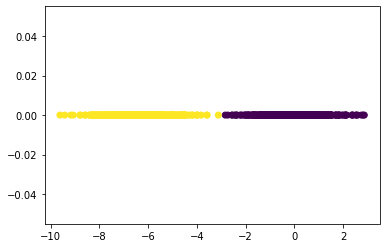

In [ ]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)


In [ ]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction


from sklearn.neighbors import KNeighborsClassifier
LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('KNN Testing accuracy =',knn.score(data_tst@ w,tst_label)*100)



KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


## LDA multiclass 
1. 3 class Sythetic data
2. Homework: Mnist 3 class and 10 class



Text(0.5, 1.0, 'distribution in y direction')

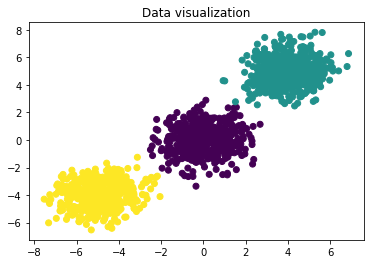

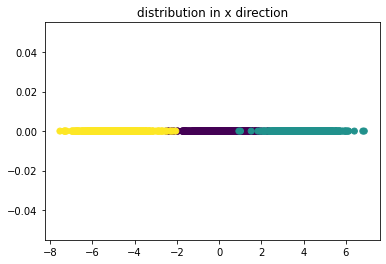

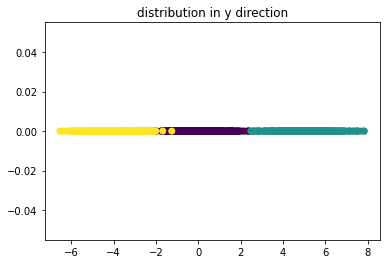

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


(2, 2)


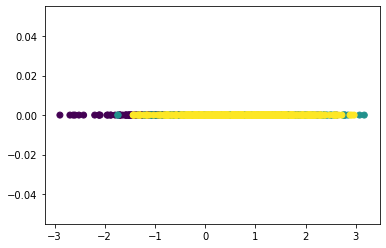

In [ ]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c=label) # by performing 1D projection

In [ ]:
# testing (using KNN)

from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data3=np.random.multivariate_normal(mean3,var,50)
data_tst=np.concatenate((data1,data2,data3))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data2.shape[0])+1))

print('KNN Testing accuracy =',knn.score(data_tst@ w,tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0
